In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.decomposition import PCA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
a = "1,046,492	1,167,142	1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
# Resid_total
import pandas as pd

# convert the string to a list of strings, then remove commas
# convert the list to a pandas Series object
a_list = [s.replace(',', '') for s in a]
data = pd.Series(a_list)

# convert the Series to a numeric type

data = pd.to_numeric(data)

# print the resulting time series dataset
# print(data)


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# generate a time series dataset

# fit an ARIMA model
arima_model = sm.tsa.arima.ARIMA(data, order=(2,1,1))
arima_results = arima_model.fit()

# print summary of the model fit
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -609.231
Date:                Tue, 13 Jun 2023   AIC                           1226.461
Time:                        21:15:25   BIC                           1234.109
Sample:                             0   HQIC                          1229.374
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0793      0.118      9.158      0.000       0.848       1.310
ar.L2         -0.0809      0.066     -1.218      0.223      -0.211       0.049
ma.L1         -0.9954      0.135     -7.353      0.0

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1     1.137404e+06
2     1.183192e+06
3     1.201243e+06
4     1.195793e+06
5     1.151371e+06
          ...     
58    1.562061e+06
59    1.568302e+06
60    1.574532e+06
61    1.580752e+06
62    1.586961e+06
Name: predicted_mean, Length: 62, dtype: float64


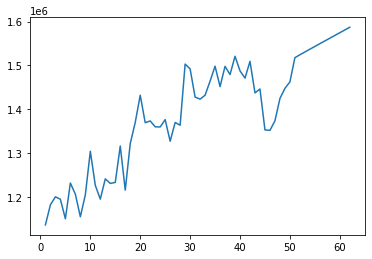

In [4]:
forecast = arima_results.predict(start=1, end=len(data)+11)

# Print the forecasted values
print(forecast)
plt.plot(forecast)

In [5]:
# load data with two year shift
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data

data_fut = data[['2019','2020']]
data_fut
df = data_fut
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
data_fut = df
data2 = data.drop(['Data_Status', 'State','2019','2020'],axis=1)
data2
a = "1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596																																																				"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
feature_list = data3.index.tolist()
feature_list.remove("ResidCA")
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)
data5

,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA,ResidUS
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,1.39,55.8,1.40,55.4,4.14,10.5,748.0,3169.0,1192848,14861651
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,1.40,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1189801,14919481
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1148722,14651895
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1220587,14814536
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1202586,15417206
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1154079,15663022
1976,1.60,149.6,1.60,149.6,1.60,149.6,3.59,28.4,3.59,28.4,...,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1196279,16143315
1977,1.70,169.1,1.70,169.1,1.70,169.1,3.97,33.0,3.97,33.0,...,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1290698,15813447
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1226364,15731634
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1192869,15247535


In [6]:
import pandas as pd
import statsmodels.api as sm


# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[feature_list[:-1]])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          306     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05531D+01    |proj g|=  3.11561D+15



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  306      1     21      1     0     0   3.116D+15  -1.055D+01
  F =  -10.553064010667102     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 517.100
Date:                Tue, 13 Jun 2023   AIC                           -422.200
Time:                        21:15:29   BIC                            156.697
Sample:                    0

1971-01-01    1189801.0
1972-01-01    1148722.0
1973-01-01    1220587.0
1974-01-01    1202586.0
1975-01-01    1154079.0
1976-01-01    1196279.0
1977-01-01    1290698.0
1978-01-01    1226364.0
1979-01-01    1192869.0
1980-01-01    1232826.0
1981-01-01    1226313.0
1982-01-01    1227952.0
1983-01-01    1304360.0
1984-01-01    1217724.0
1985-01-01    1308727.0
1986-01-01    1359856.0
1987-01-01    1420797.0
1988-01-01    1367856.0
1989-01-01    1367567.0
1990-01-01    1355310.0
1991-01-01    1354131.0
1992-01-01    1369438.0
1993-01-01    1325392.0
1994-01-01    1361384.0
1995-01-01    1358381.0
1996-01-01    1486214.0
1997-01-01    1485795.0
1998-01-01    1426721.0
1999-01-01    1417985.0
2000-01-01    1425659.0
2001-01-01    1455716.0
2002-01-01    1489320.0
2003-01-01    1449101.0
2004-01-01    1488574.0
2005-01-01    1474374.0
2006-01-01    1511586.0
2007-01-01    1483981.0
2008-01-01    1466657.0
2009-01-01    1500559.0
2010-01-01    1437024.0
2011-01-01    1440463.0
2012-01-01    13

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/2791670771.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

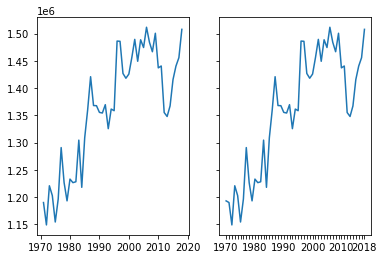

In [7]:
forecast = results.predict(start=1, end=48, exog=data5[feature_list[:-1]])

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)

x_values = data5.index
x_values = ['' if int(year)%10 != 0 and int(year) != 2018 else year for year in x_values]
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

In [8]:
data_fut = data_fut.fillna(0)

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/1818023078.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

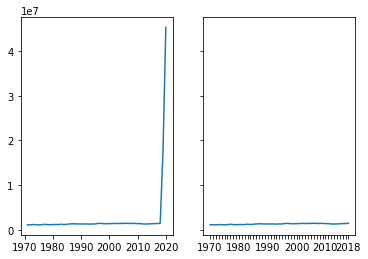

In [9]:
forecast = results.predict(start=1, end=50, exog=data_fut)

# Print the forecasted values
# print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

2019-01-01    1.768077e+07
2020-01-01    4.527639e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3952776612.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

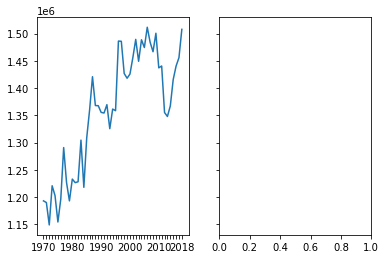

In [10]:
forecast = results.forecast(steps=2,exog = data_fut)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax2.plot(forecast)
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

In [11]:
# data load and combine
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data
data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
data3 = pd.concat([data2,Resid_total])
data3
a = "1,046,492	1,167,142	1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "13,728,645	14,210,554	14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596																																																				"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)

In [12]:
a = data5.columns.tolist()

In [13]:
df = data5[a]
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

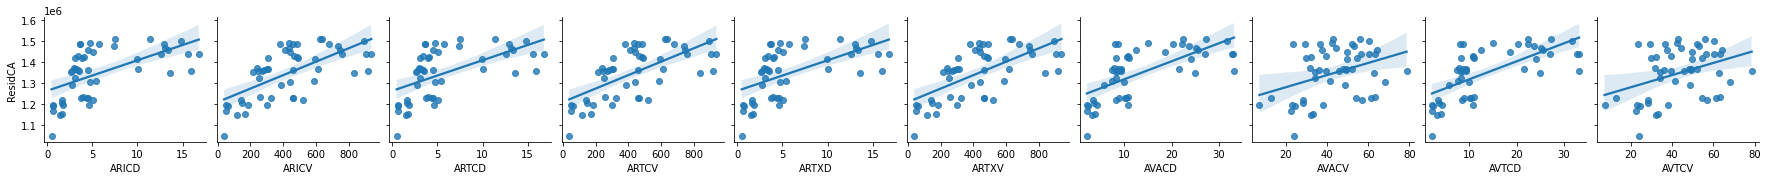

In [14]:
sns.pairplot(data5, x_vars=feature_list[:10], y_vars='ResidCA', kind='reg')
plt.show()

In [15]:
# Load dataset
df = data5
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.5 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.8].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

,ResidCA,DFSCB,ESCCD,ESCCV,ESICV,ESRCD,ESRCV,ESSCB,ESTCD,ESTCV,...,TEPFB,TERCD,TERCV,TNASB,TNCSB,TNSCB,TPOPP,WWIXB,WWSCB,ResidUS
1970,1046492,224717.0,5.02,696.1,392.2,6.53,797.6,396018.0,4.76,1886.6,...,1472146.0,1.91,1401.4,1814301.0,435890.0,4026993.0,20007.0,59783.0,40107.0,13728645
1971,1167142,273402.0,5.31,774.0,425.9,6.78,903.8,419853.0,5.01,2104.4,...,1505667.0,1.95,1616.7,1888925.0,479285.0,4241990.0,20346.0,61039.0,40860.0,14210554
1972,1192848,265247.0,5.63,911.8,488.7,7.22,1017.2,451137.0,5.36,2418.5,...,1597518.0,2.10,1762.4,1911768.0,466393.0,4274489.0,20585.0,66904.0,43743.0,14861651
1973,1189801,297691.0,6.14,1033.6,555.8,7.72,1146.2,465656.0,5.88,2737.6,...,1662750.0,2.35,1931.7,1964848.0,478391.0,4384316.0,20869.0,69551.0,44621.0,14919481
1974,1148722,250298.0,8.04,1261.2,775.2,9.89,1435.0,437531.0,7.94,3473.5,...,1611282.0,2.97,2320.4,1878344.0,465657.0,4205043.0,21174.0,72152.0,46163.0,14651895
1975,1220587,242424.0,8.73,1723.0,988.9,10.68,1612.8,496939.0,8.71,4328.7,...,1729876.0,3.19,2675.0,1932322.0,497848.0,4302965.0,21538.0,64728.0,43495.0,14814536
1976,1202586,264184.0,9.61,1989.4,1182.0,11.19,1746.2,519265.0,9.48,4922.6,...,1814624.0,3.56,2880.4,2046433.0,483872.0,4371695.0,21936.0,74844.0,49434.0,15417206
1977,1154079,298135.0,12.04,2498.7,1512.9,12.41,1971.3,527073.0,11.36,5989.6,...,1856350.0,4.10,3079.9,2189431.0,499522.0,4505114.0,22352.0,77087.0,51882.0,15663022
1978,1196279,348910.0,13.10,2740.5,1771.2,13.13,2208.9,542893.0,12.39,6727.4,...,1884696.0,4.44,3391.2,2355799.0,499084.0,4587999.0,22836.0,80541.0,54569.0,16143315
1979,1290698,384913.0,13.07,2801.8,1880.8,13.10,2343.0,565632.0,12.43,7031.3,...,1945802.0,4.78,3985.8,2333894.0,539498.0,4781813.0,23257.0,81617.0,57110.0,15813447


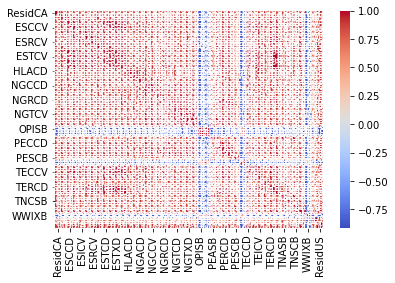

In [16]:
# Correlation analysis
df = df_high_corr
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
data6 = df_high_corr
a = data6.columns.tolist()[1:]

In [18]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[data6.columns.tolist()[1:]])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           46     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02196D+01    |proj g|=  4.80656D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   46      1     21      1     0     0   4.807D+01   1.022D+01
  F =   10.219574793373477     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   51
Model:               SARIMAX(1, 0, 0

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [20]:
# load data with two year shift
# 这里调整好了
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data

data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
a = "1,046,492	1,167,142	1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "13,728,645	14,210,554	14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596																																																				"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
feature_list = data3.index.tolist()
feature_list.remove("ResidCA")
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)
data5

data_fut = data5.loc[['2019','2020']]
data_fut
data5 = data5.drop(['2019','2020'])
data5


,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA,ResidUS
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,1.39,55.8,1.40,55.4,4.14,10.5,748.0,3169.0,1046492,13728645
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,1.40,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1167142,14210554
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1192848,14861651
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1189801,14919481
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1148722,14651895
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1220587,14814536
1976,1.60,149.6,1.60,149.6,1.60,149.6,3.59,28.4,3.59,28.4,...,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1202586,15417206
1977,1.70,169.1,1.70,169.1,1.70,169.1,3.97,33.0,3.97,33.0,...,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1154079,15663022
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1196279,16143315
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1290698,15813447


In [21]:
# drop duplicate data feature

# TNASB & PEASB
# OPSCB & OPISB
data6 = data5.drop(['TNASB','OPSCB'],axis = 1)
data6
features = data5.drop("ResidCA",axis = 1)

In [22]:
# Load dataset
df = data6
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.5 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.85].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

,ResidCA,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,PESCB,TEPFB,TNCSB,TNSCB,TPOPP,WWIXB,ResidUS
1970,1046492,224717.0,396018.0,152.9,544.3,906.5,1814079.0,603.8,4472838.0,1472146.0,435890.0,4026993.0,20007.0,59783.0,13728645
1971,1167142,273402.0,419853.0,181.6,652.4,1059.9,1888703.0,712.9,4668262.0,1505667.0,479285.0,4241990.0,20346.0,61039.0,14210554
1972,1192848,265247.0,451137.0,188.1,687.6,1120.2,1911495.0,745.2,4765624.0,1597518.0,466393.0,4274489.0,20585.0,66904.0,14861651
1973,1189801,297691.0,465656.0,198.0,714.8,1196.5,1964194.0,785.6,4911626.0,1662750.0,478391.0,4384316.0,20869.0,69551.0,14919481
1974,1148722,250298.0,437531.0,227.2,800.4,1389.3,1877816.0,885.4,4530411.0,1611282.0,465657.0,4205043.0,21174.0,72152.0,14651895
1975,1220587,242424.0,496939.0,309.6,993.8,1842.9,1931418.0,1062.3,4658922.0,1729876.0,497848.0,4302965.0,21538.0,64728.0,14814536
1976,1202586,264184.0,519265.0,349.1,1061.9,2065.4,2045431.0,1134.2,4831220.0,1814624.0,483872.0,4371695.0,21936.0,74844.0,15417206
1977,1154079,298135.0,527073.0,471.7,1022.2,2366.7,2188626.0,1108.5,5243449.0,1856350.0,499522.0,4505114.0,22352.0,77087.0,15663022
1978,1196279,348910.0,542893.0,497.0,1066.8,2285.4,2355039.0,1182.3,5083948.0,1884696.0,499084.0,4587999.0,22836.0,80541.0,16143315
1979,1290698,384913.0,565632.0,706.4,1458.5,3127.8,2333123.0,1642.8,5415031.0,1945802.0,539498.0,4781813.0,23257.0,81617.0,15813447


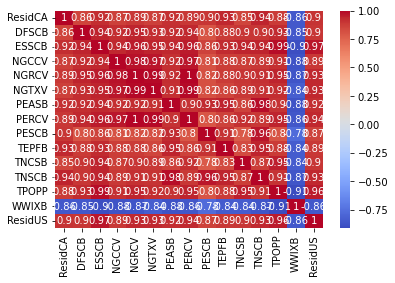

In [23]:
# Correlation analysis
df = df_high_corr
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
data_fut2 = data_fut
data_fut2 = data_fut2[high_corr_features]
data_fut2

,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,PESCB,TEPFB,TNCSB,TNSCB,TPOPP,WWIXB,ResidUS
2019,566221.0,846178.0,2408.8,6017.5,13409.8,3029638.0,6866.1,5641205.0,2149057.0,751533.0,5641047.0,39438.0,11025.0,21042063
2020,527670.0,845308.0,2275.2,6483.2,13057.8,2330345.0,7142.9,4869977.0,2088910.0,697399.0,4833847.0,39500.0,11006.0,20520596


In [25]:
high_corr_features.remove('ResidUS')
high_corr_features

['DFSCB',
 'ESSCB',
 'NGCCV',
 'NGRCV',
 'NGTXV',
 'PEASB',
 'PERCV',
 'PESCB',
 'TEPFB',
 'TNCSB',
 'TNSCB',
 'TPOPP',
 'WWIXB']

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14412D+01    |proj g|=  1.26309D+00

At iterate    5    f=  1.14410D+01    |proj g|=  2.04490D-02

At iterate   10    f=  1.14409D+01    |proj g|=  1.15859D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3936857681.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['2019-01-01', '', '', '', '', '', '2020-01-01'])
/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3936857681.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)



At iterate   15    f=  1.14408D+01    |proj g|=  1.07151D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     15     35      1     0     0   1.072D-01   1.144D+01
  F =   11.440846170992762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -560.601
Date:                Tue, 13 Jun 2023   AIC                           1151.203
Time:                        21:17:01   BIC  

[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

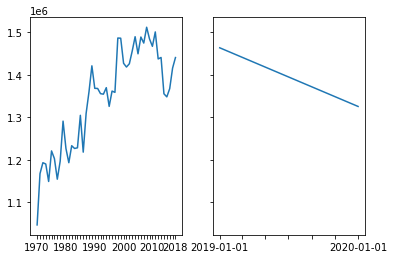

In [26]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[high_corr_features])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

forecast = results.forecast(steps=2,exog = data_fut[high_corr_features])

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(forecast)
ax2.xaxis.set_ticklabels(['2019-01-01', '', '', '', '', '', '2020-01-01'])
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/1257772617.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

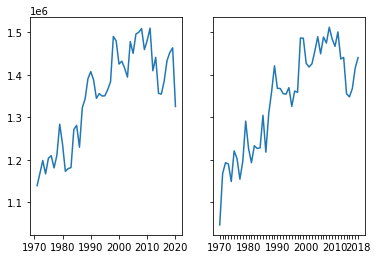

In [27]:
forecast = results.predict(start=1, end=50, exog=data_fut[high_corr_features])

# Print the forecasted values
# print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

([<matplotlib.axis.XTick at 0x7f87e55151c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

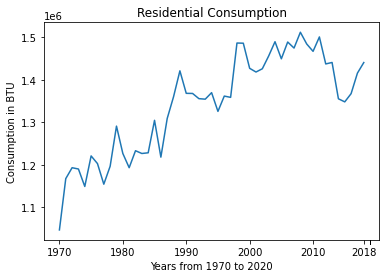

In [28]:
plt.plot(data5["ResidCA"])
plt.xlabel('Years from 1970 to 2020')
plt.ylabel('Consumption in BTU')
plt.title('Residential Consumption')
plt.xticks(x_values)

In [29]:
high_corr_features[4]

'NGTXV'

([<matplotlib.axis.XTick at 0x7f87e4556310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

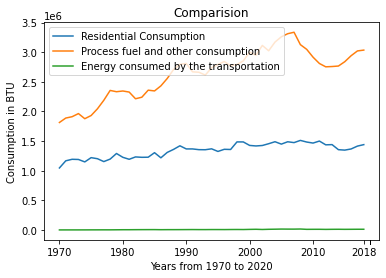

In [30]:
plt.plot(data5["ResidCA"],label = "Residential Consumption")
plt.xlabel('Years from 1970 to 2020')
plt.ylabel('Consumption in BTU')
plt.title('Comparision')

# plt.plot(data5[high_corr_features[6]],label = "Total net energy consumption")
plt.plot(data5[high_corr_features[5]], label = "Process fuel and other consumption")
plt.plot(data5[high_corr_features[4]], label = "Energy consumed by the transportation")
plt.legend()
plt.xticks(x_values)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Create example data
np.random.seed(42)
X = df_high_corr

# Fit PCA model
pca = PCA(n_components=0.85)
pca.fit(X)
X_pca = pca.transform(X)

# Create scatter plot
# plt.scatter(X_pca[:, 0], X_pca[:, 1])

# # Add axis labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot')

# # Show plot
# plt.show()


In [32]:
a = pd.DataFrame(X_pca)
a

,0
0,4.835271e+06
1,4.278289e+06
2,3.626313e+06
3,3.507821e+06
4,3.889503e+06
5,3.668739e+06
6,3.029926e+06
7,2.669754e+06
8,2.199545e+06
9,2.401320e+06


In [33]:

X = features

# Fit PCA model
pca = PCA(n_components=0.85)
pca.fit(X)
X_pca = pca.transform(X)

# Create scatter plot
# plt.scatter(X_pca[:, 0], X_pca[:, 1])

# # Add axis labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot')

# Show plot

In [34]:
df = features
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized = df_normalized.fillna(0)

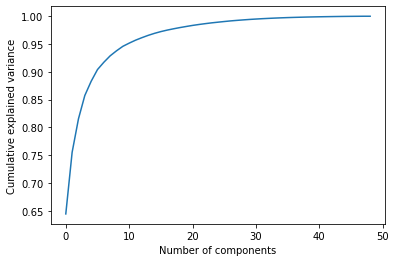

In [35]:
data = df_normalized

# Create a PCA object and fit the data
pca = PCA().fit(data)

# Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [36]:
X = df_normalized

# Fit PCA model
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

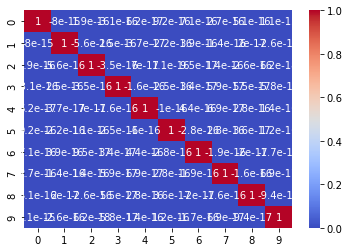

In [37]:
df = pd.DataFrame(X_pca)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:

df.index = data5.index
a = pd.concat([df,data5["ResidCA"]],axis = 1)

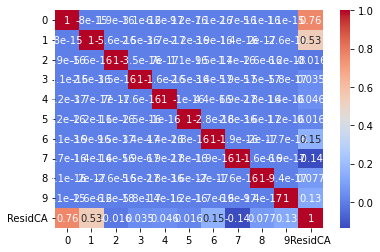

In [39]:
# Correlation analysis
df = a
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05789D+01    |proj g|=  1.78906D+15

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      1     21      1     0     0   1.789D+15  -1.058D+01
  F =  -10.578901341209164     

ABNORMAL_TERMINATION_IN_LNSRCH                              
1971-01-01    1167142.0
1972-01-01    1192848.0
1973-01-01    1189801.0
1974-01-01    1148722.0
1975-01-01    1220587.0
1976-01-01    1202586.0
1977-01-01    1154079.0
1978-01-01    1196279.0
19

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3510116881.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

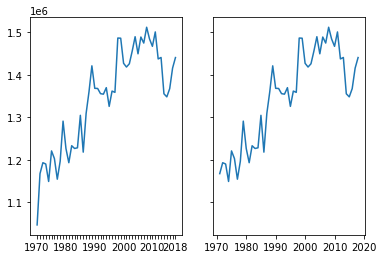

In [40]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=df)

# Fit the model
results = model.fit()

# Print the model summary
# print(results.summary())

forecast = results.predict(start = 1,end = 48)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(forecast)
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

In [41]:
train_y = data5["ResidCA"][:47]
train_x = df[df.columns][:47]
test_y = data5["ResidCA"][47:]
test_x = df[df.columns][47:]

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05418D+01    |proj g|=  1.37367D+14

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      1     21      1     0     0   1.374D+14  -1.054D+01
  F =  -10.541759867885125     

ABNORMAL_TERMINATION_IN_LNSRCH                              
1971-01-01    1167142.0
1972-01-01    1192848.0
1973-01-01    1189801.0
1974-01-01    1148722.0
1975-01-01    1220587.0
1976-01-01    1202586.0
1977-01-01    1154079.0
1978-01-01    1196279.0
19

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3168900169.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

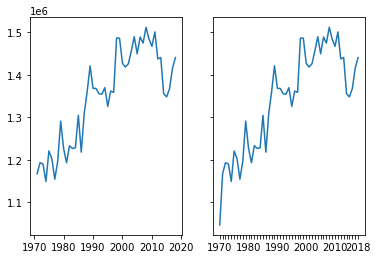

In [42]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(train_y, exog=train_x)

# Fit the model
results = model.fit()

# Print the model summary
# print(results.summary())

forecast = results.predict(start=1,end=48,exog = test_x)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

In [43]:
train_y[-2:]

2015    1347770
2016    1367103
Name: ResidCA, dtype: int64

In [44]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.columns

RangeIndex(start=0, stop=10, step=1)

In [45]:
df = a



# Split the data into training and testing sets
train = df.iloc[:len(df)-10]
test = df.iloc[len(df)-10:]

# Fit a SARIMAX model on the long-format dataframe
model = SARIMAX(endog=train['ResidCA'], exog=train[X_pca_df.columns], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Use the fitted model to make predictions on the testing set
test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])

# Reshape the predicted values back to wide format
predictions = test["Prediction"]

predictions = results.forecast(steps=len(test),exog = test[X_pca_df.columns])

# Calculate the MAPE for the predictions
mape = mean_absolute_percentage_error(test["ResidCA"], predictions)
print(f"MAPE: {mape}")


/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting paramet

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36014D+01    |proj g|=  1.23464D+01

At iterate    5    f=  8.03996D+00    |proj g|=  1.50532D-01

At iterate   10    f=  7.99786D+00    |proj g|=  4.04081D-02

At iterate   15    f=  7.98293D+00    |proj g|=  9.77391D-03

At iterate   20    f=  7.98016D+00    |proj g|=  1.03747D-03

At iterate   25    f=  7.97954D+00    |proj g|=  1.83033D-03

At iterate   30    f=  7.97885D+00    |proj g|=  3.31518D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/1411475429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])


In [46]:
mape

0.30948892877668255

2009-01-01    1.647895e+06
2010-01-01    1.445174e+06
2011-01-01    1.362606e+06
2012-01-01    1.061742e+06
2013-01-01    9.457591e+05
2014-01-01    7.739754e+05
2015-01-01    7.068855e+05
2016-01-01    7.484356e+05
2017-01-01    7.806971e+05
2018-01-01    7.662955e+05
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3524952906.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])
/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/3524952906.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])


[Text(0, 0, ''),
 Text(1, 0, '2010'),
 Text(2, 0, ''),
 Text(3, 0, '2012'),
 Text(4, 0, ''),
 Text(5, 0, '2014'),
 Text(6, 0, ''),
 Text(7, 0, '2016'),
 Text(8, 0, ''),
 Text(9, 0, '2018')]

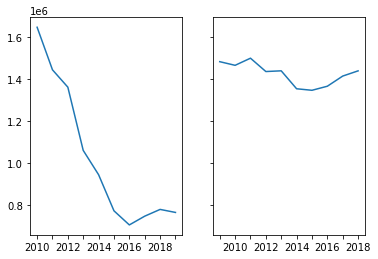

In [47]:
print(predictions)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(predictions)
ax2.plot(test["ResidCA"])
ax1.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])
ax2.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])

/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/titanium/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82274D+00    |proj g|=  2.31979D-01

At iterate    5    f=  8.81749D+00    |proj g|=  4.65308D-02

At iterate   10    f=  8.81140D+00    |proj g|=  1.14082D-01

At iterate   15    f=  8.79777D+00    |proj g|=  2.62999D-02

At iterate   20    f=  8.79252D+00    |proj g|=  1.57504D-02

At iterate   25    f=  8.79193D+00    |proj g|=  1.73240D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     26     30      1     0     0   

/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/2104351091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])
/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/2104351091.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)
/var/folders/j8/2kchcqp9529bf817bgxx5zyh0000gn/T/ipykernel_66934/2104351091.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['2017-01-01', '', '', '', '', '', '2018-01-01'])


[Text(17167.0, 0, '2017-01-01'),
 Text(17226.0, 0, ''),
 Text(17287.0, 0, ''),
 Text(17348.0, 0, ''),
 Text(17410.0, 0, ''),
 Text(17471.0, 0, ''),
 Text(17532.0, 0, '2018-01-01')]

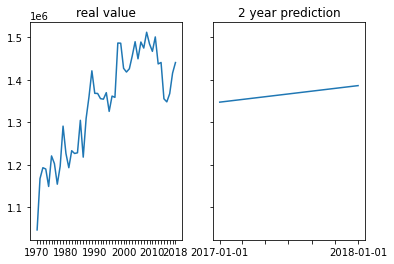

In [48]:
df = a



# Split the data into training and testing sets
train = df.iloc[:len(df)-2]
test = df.iloc[len(df)-2:]

# Fit a SARIMAX model on the long-format dataframe
model = SARIMAX(endog=train['ResidCA'], exog=train[X_pca_df.columns], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Use the fitted model to make predictions on the testing set
test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])

# Reshape the predicted values back to wide format
predictions = test["Prediction"]

predictions = results.forecast(steps=len(test),exog = test[X_pca_df.columns])

# Calculate the MAPE for the predictions
mape = mean_absolute_percentage_error(test["ResidCA"], predictions)
print(f"MAPE: {mape}")
print(predictions)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(predictions)
ax1.plot(data5["ResidCA"])
# f.suptitle('Two Subplots')
ax2.set_title('2 year prediction')
ax1.set_title('real value')

ax1.xaxis.set_ticklabels(x_values)
ax2.xaxis.set_ticklabels(['2017-01-01', '', '', '', '', '', '2018-01-01'])

In [49]:
# regression model
# Load dataset
df = data6
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.85 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.85].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

,ResidCA,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,PESCB,TEPFB,TNCSB,TNSCB,TPOPP,WWIXB,ResidUS
1970,1046492,224717.0,396018.0,152.9,544.3,906.5,1814079.0,603.8,4472838.0,1472146.0,435890.0,4026993.0,20007.0,59783.0,13728645
1971,1167142,273402.0,419853.0,181.6,652.4,1059.9,1888703.0,712.9,4668262.0,1505667.0,479285.0,4241990.0,20346.0,61039.0,14210554
1972,1192848,265247.0,451137.0,188.1,687.6,1120.2,1911495.0,745.2,4765624.0,1597518.0,466393.0,4274489.0,20585.0,66904.0,14861651
1973,1189801,297691.0,465656.0,198.0,714.8,1196.5,1964194.0,785.6,4911626.0,1662750.0,478391.0,4384316.0,20869.0,69551.0,14919481
1974,1148722,250298.0,437531.0,227.2,800.4,1389.3,1877816.0,885.4,4530411.0,1611282.0,465657.0,4205043.0,21174.0,72152.0,14651895
1975,1220587,242424.0,496939.0,309.6,993.8,1842.9,1931418.0,1062.3,4658922.0,1729876.0,497848.0,4302965.0,21538.0,64728.0,14814536
1976,1202586,264184.0,519265.0,349.1,1061.9,2065.4,2045431.0,1134.2,4831220.0,1814624.0,483872.0,4371695.0,21936.0,74844.0,15417206
1977,1154079,298135.0,527073.0,471.7,1022.2,2366.7,2188626.0,1108.5,5243449.0,1856350.0,499522.0,4505114.0,22352.0,77087.0,15663022
1978,1196279,348910.0,542893.0,497.0,1066.8,2285.4,2355039.0,1182.3,5083948.0,1884696.0,499084.0,4587999.0,22836.0,80541.0,16143315
1979,1290698,384913.0,565632.0,706.4,1458.5,3127.8,2333123.0,1642.8,5415031.0,1945802.0,539498.0,4781813.0,23257.0,81617.0,15813447


In [50]:
high_corr_features.remove('ResidUS')

In [51]:
high_corr_features

['DFSCB',
 'ESSCB',
 'NGCCV',
 'NGRCV',
 'NGTXV',
 'PEASB',
 'PERCV',
 'PESCB',
 'TEPFB',
 'TNCSB',
 'TNSCB',
 'TPOPP',
 'WWIXB']

In [52]:
data_fut2 = data_fut
data_fut2 = data_fut2[high_corr_features]
data_fut2

,DFSCB,ESSCB,NGCCV,NGRCV,NGTXV,PEASB,PERCV,PESCB,TEPFB,TNCSB,TNSCB,TPOPP,WWIXB
2019,566221.0,846178.0,2408.8,6017.5,13409.8,3029638.0,6866.1,5641205.0,2149057.0,751533.0,5641047.0,39438.0,11025.0
2020,527670.0,845308.0,2275.2,6483.2,13057.8,2330345.0,7142.9,4869977.0,2088910.0,697399.0,4833847.0,39500.0,11006.0


In [53]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   #Slice and dice the training and validation sets
import pandas as pd
import os
import seaborn as sns

In [54]:
X = df_high_corr[high_corr_features]
Y = df_high_corr['ResidCA']

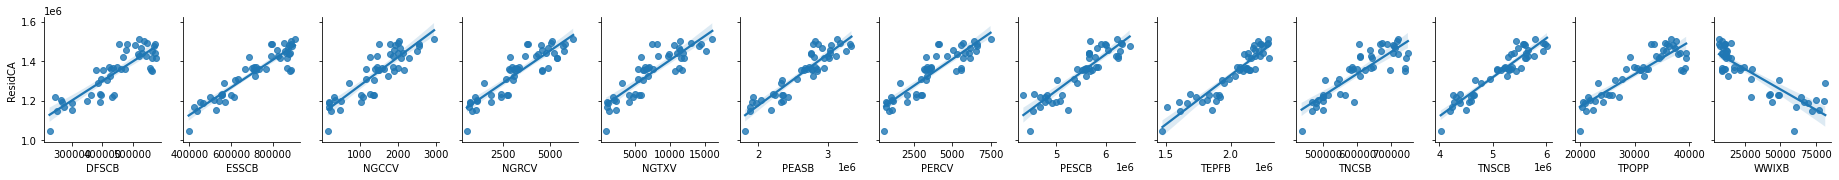

In [55]:
sns.pairplot(df_high_corr, x_vars = high_corr_features, y_vars = 'ResidCA', aspect = 0.8, kind='reg')

In [56]:
linear_regressor = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)   #Then it means 7:3 for dividing the data set
l_reg = linear_regressor.fit(x_train, y_train)  #Fitting function

In [57]:
Y_pred = l_reg.predict(x_test)   #Prediction y After using the training set train to get the fit function, then use the test set test to get the prediction value
print('aWeight:',linear_regressor.coef_)
print('bIntercept:',linear_regressor.intercept_)

aWeight: [-8.95329581e-02  8.48760608e-01  2.23068734e+01  2.46426932e+01
 -4.86784062e+01 -1.25391758e-01  1.03557275e+02  6.13737446e-03
  3.17694086e-02  1.87644717e-01  1.96062174e-01 -2.63874553e+01
 -4.79189159e-01]
bIntercept: 577637.2798857769


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mes_test = mean_squared_error(y_test,Y_pred)

print("Mean squared error (MSE):",mean_squared_error(y_test,Y_pred))
print("Root Mean Square Error (RMSE):",mean_absolute_error(y_test,Y_pred))
print("Mean absolute error (MAE):",r2_score(y_test,Y_pred))

RR = linear_regressor.score(x_test,y_test)  #Linear regression: R_square;
print("Determination factor:",RR)  #The closer the model is to 1, the better the model is

Mean squared error (MSE): 2026755039.486661
Root Mean Square Error (RMSE): 39054.92104348484
Mean absolute error (MAE): 0.8596062250731987
Determination factor: 0.8596062250731987


In [59]:
Y_train_pred = linear_regressor.predict(x_train)   #Prediction y
mse_train = mean_squared_error(y_train,Y_train_pred) # When the mes_train and mse_test errors are small, it proves that the model is not overfitted.

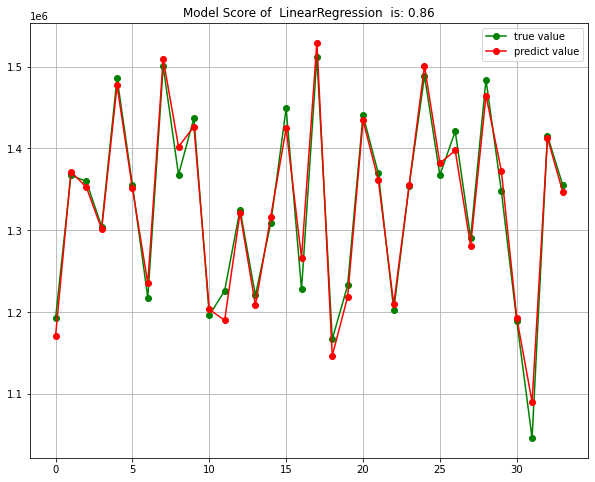

In [60]:
#Difference between predicted and true values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(Y_train_pred)), y_train,'go-',label='true value')
plt.plot(np.arange(len(Y_train_pred)),Y_train_pred,'ro-',label='predict value')
plt.title("Model Score of  LinearRegression  is: {:.2f}".format(RR))
#Get axis
ax=plt.gca()
plt.grid(True)
plt.legend()
plt.show()

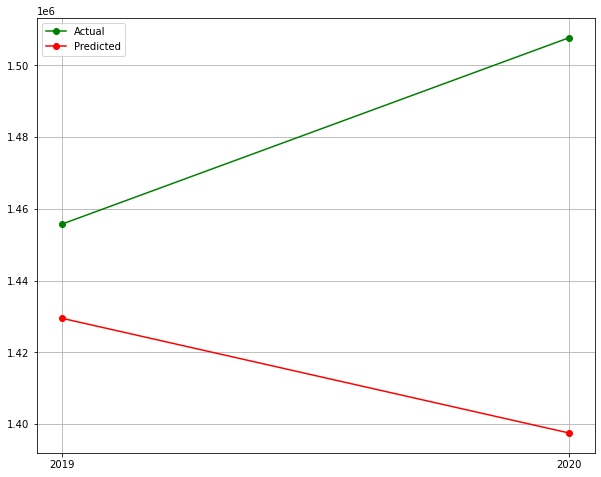

In [61]:
#Comparing 2019 and 2020 data using LinearRegression model
data_fut2
Y_fut_actual = data_fut['ResidCA']
Y_fut_predicted = linear_regressor.predict(data_fut2)
plt.figure(figsize=(10,8))
plt.plot(['2019', '2020'], Y_fut_actual,'go-',label='Actual')
plt.plot(['2019', '2020'],Y_fut_predicted,'ro-',label='Predicted')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.legend()
plt.show()

In [62]:
new_df = pd.DataFrame({'ResidCA': list(Y_fut_actual), 'predictions':list(np.round(Y_fut_predicted,2))}, index = ['2019', '2020'])
new_df

,ResidCA,predictions
2019,1455751,1429501.95
2020,1507721,1397505.63


In [63]:
#Calculate the difference between the predicted value and the true value
y_LR = []
for i in range(len(Y_train_pred)):
    y_LR.append(Y_train_pred[i] - y_train[i])

In [64]:
#Second method
import statsmodels.api as sm
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
model = sm.OLS(y_train, x_train) #Generate Model
result = model.fit() #Model Fitting
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ResidCA   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              6233.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                    1.34e-34
Time:                        21:17:19   Log-Likelihood:                         -387.40
No. Observations:                  34   AIC:                                      800.8
Df Residuals:                      21   BIC:                                      820.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DFSCB         -0.1145      0.191     -0.598      0.556      -0.512       0.283
ESSCB          0.1879      0.372      0.505      0.619      -0.587       0.963
NGCCV         81.3956     40.331      2.018      0.057      -2.477     165.268
NGRCV        -84.9007     62.319     -1.362      0.188    -214.500      44.698
NGTXV        -52.3107     13.058     -4.006      0.001     -79.466     -25.155
PEASB         -0.2287      0.082     -2.802      0.011      -0.398      -0.059
PERCV        177.4630     43.558      4.074      0.001      86.879     268.047
PESCB         -0.1041      0.065     -1.594      0.126      -0.240       0.032
TEPFB          0.1108      0.110      1.011      0.324      -0.117       0.339
TNCSB         -0.0860      0.259     -0.332      0.743      -0.625       0.453
TNSCB          0.4881      0.106      4.591      0.000       0.267       0.709
TPOPP        -12.1041      6.425     -1.884      0.073     -25.465       1.257
WWIXB          0.6366      0.516      1.234      0.231      -0.436       1.709
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.341
Skew:                          -0.099   Prob(JB):                        0.843
Kurtosis:                       2.552   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
Y_train_pred = result.predict(x_train)

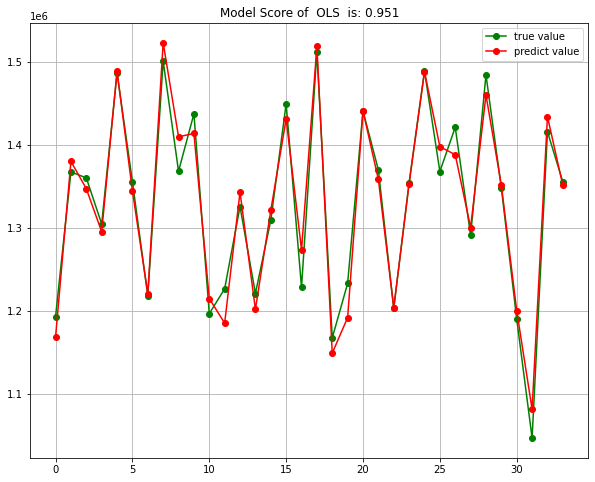

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(Y_train_pred)), y_train,'go-',label='true value')
plt.plot(np.arange(len(Y_train_pred)),Y_train_pred,'ro-',label='predict value')
plt.title("Model Score of  OLS  is: 0.951")
#Get axis
ax=plt.gca()
plt.grid(True)
plt.legend()
plt.show()

In [67]:
y_OLS = []
for i in range(len(Y_train_pred)):
    y_OLS.append(Y_train_pred[i] - y_train[i])

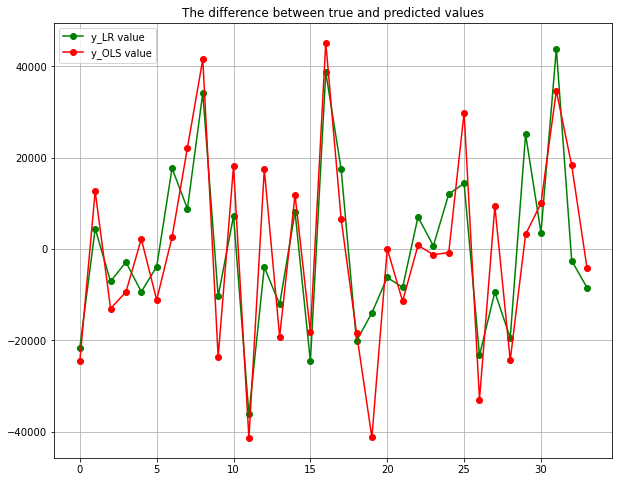

In [68]:
#Compare the difference between the predicted and true values of the two methods
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(y_LR)), y_LR, 'go-', label='y_LR value')
plt.plot(np.arange(len(y_OLS)),y_OLS,'ro-',label='y_OLS value')
plt.title("The difference between true and predicted values")
plt.grid(True)
plt.legend()
plt.show()

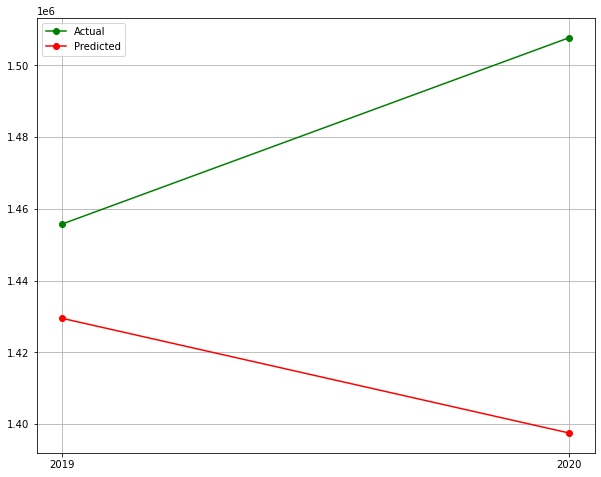

In [69]:
#Comparing 2019 and 2020 data using LinearRegression model
data_fut2
Y_fut_actual = data_fut['ResidCA']
Y_fut_predicted = linear_regressor.predict(data_fut2)
plt.figure(figsize=(10,8))
plt.plot(['2019', '2020'], Y_fut_actual,'go-',label='Actual')
plt.plot(['2019', '2020'],Y_fut_predicted,'ro-',label='Predicted')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.legend()
plt.show()

In [70]:
new_df = pd.DataFrame({'ResidCA': list(Y_fut_actual), 'predictions':list(np.round(Y_fut_predicted
                                                                                  ,2))}, index = ['2019', '2020'])
new_df

,ResidCA,predictions
2019,1455751,1429501.95
2020,1507721,1397505.63


In [71]:
# Confidence intervals and assumptions used for SARIMAX model

#SARIMAX model is a time series model. It is based on the ARIMA model with the addition of seasonal factors, and can be used to deal with data with seasonal cycles.
# Split the data into training and testing sets
train = df.iloc[:len(df)-10]
test = df.iloc[len(df)-10:]

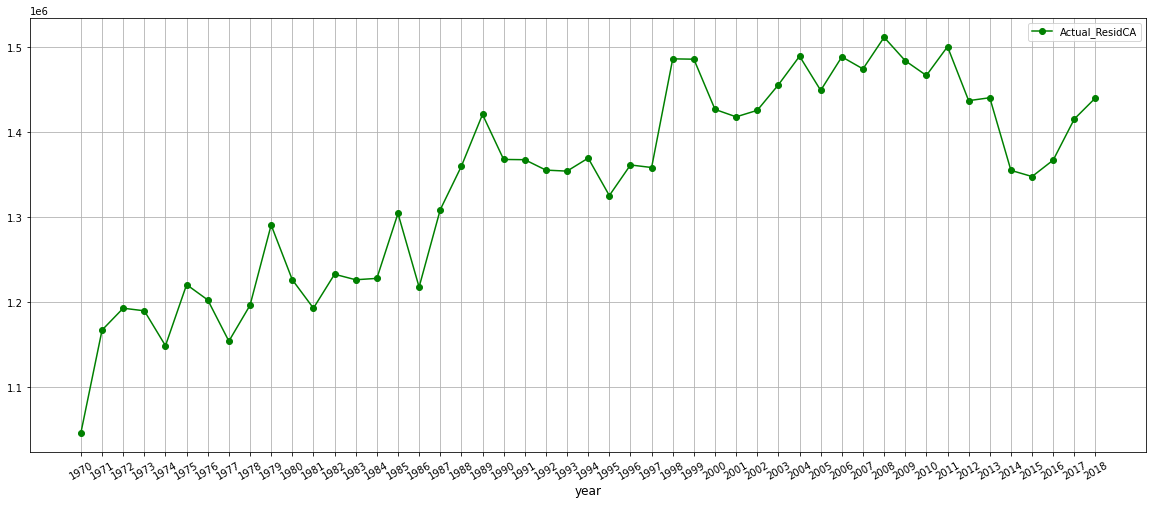

In [72]:
#View temporal characteristics
import matplotlib.pyplot as plt

x = list(df['ResidCA'].index)
y = list(df['ResidCA'])

plt.figure(figsize=(20,8))
plt.plot(x, y,'go-',label='Actual_ResidCA')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.xlabel('year', fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.legend()
plt.show()

In [73]:
#View the data in a seasonal decomposition of this time series
#It is decomposed into trend, seasonal and randomness components. Finally, we save these three components into trend, seasonal and randomness variables, respectively.
import matplotlib as plt

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['ResidCA'], model ='additive', period = 12)

#Visit the decomposed trend, seasonal and stochastic components separately 
trend = result.trend  
seasonal = result.seasonal  
randomness = result.resid

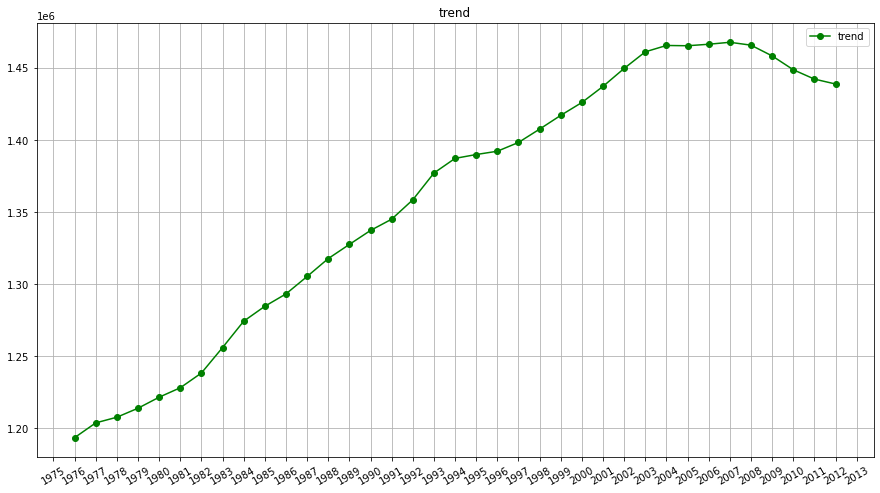

In [74]:
#View temporal characteristics
import matplotlib.pyplot as plt

x_trend = list(trend.index)
y_trend = list(trend)

x_seasonal = list(seasonal.index)
y_seasonal = list(seasonal)

x_randomness = list(randomness.index)
y_randomness = list(randomness)

plt.figure(figsize=(15,8))
plt.plot(x_trend, y_trend,'go-',label='trend')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.title('trend', fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.legend()
plt.show()

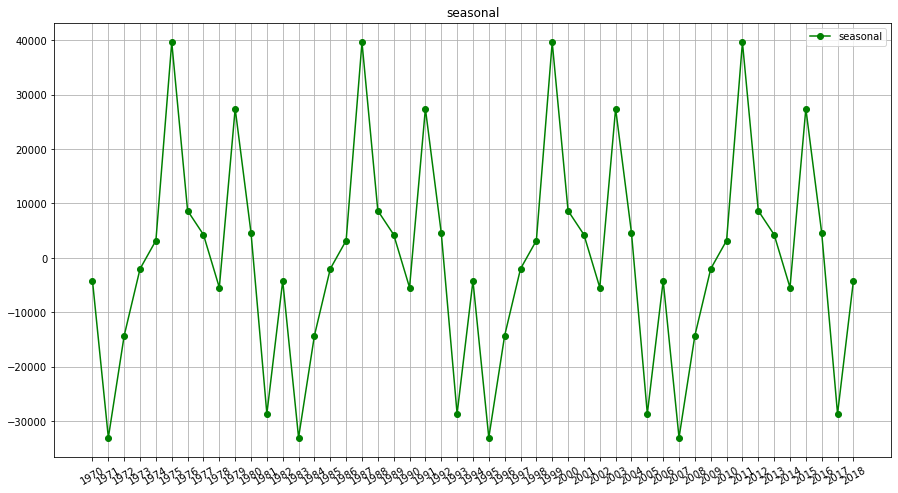

In [75]:
plt.figure(figsize=(15,8))
plt.plot(x_seasonal, y_seasonal,'go-',label='seasonal')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.title('seasonal', fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.legend()
plt.show()

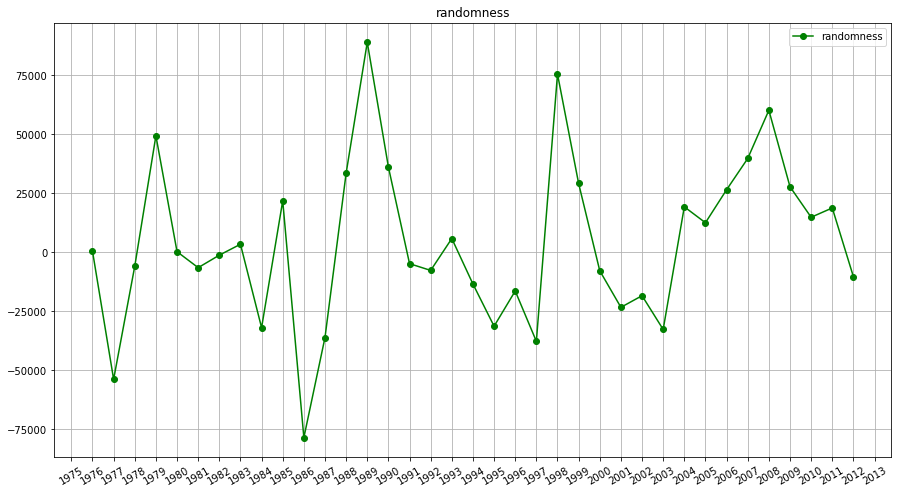

In [76]:
plt.figure(figsize=(15,8))
plt.plot(x_randomness, y_randomness,'go-',label='randomness')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.title('randomness', fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.legend()
plt.show()

In [77]:
!pip install pmdarima

In [78]:
# The "auto_arima" function in the pmdarima library helps us to determine the best parameters for the SARIMAX model and return a fitted SARIMAX model.

from pmdarima import auto_arima
# Ignore harmless warnings
import warnings

warnings.filterwarnings("ignore")


In [79]:
stepwise_fit = auto_arima(df['ResidCA'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # Ignore errors and continue execution
                          suppress_warnings = True,  # Do not converge on the warning
                          stepwise = True)           # Set to step-by-step, i.e. see everything possible

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=914.613, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=913.097, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=912.413, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=912.024, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=911.592, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=912.367, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=914.474, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=913.780, Time=0.04 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=911.605, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=915.171, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=913.526, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.824 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   49
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -453.796
Date:                             Tue, 13 Jun 2023   AIC                            911.592
Time:                                     21:17:31   BIC                            914.759
Sample:                                 01-01-1970   HQIC                           912.697
                                      - 01-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0856      0.086      0.996      0.319      -0.083       0.254
sigma2      4.946e+09   2.68e-12   1.85e+21      0.000    4.95e+09    4.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.94   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.16   Prob(JB):                         0.21
Heteroskedasticity (H):               0.84   Skew:                             0.55
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+37. Standard errors may be unstable.
"""

In [80]:
# From the above
# Model: SARIMAX(0, 1, 0)x(1, 1, 1, 12)

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ResidCA'], 
                order = (0, 1, 0), 
                seasonal_order =(1, 1, 1, 12))

result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44820D+00    |proj g|=  2.25828D-01

At iterate    5    f=  8.44184D+00    |proj g|=  5.98810D-02

At iterate   10    f=  8.42250D+00    |proj g|=  1.13656D-01

At iterate   15    f=  8.39847D+00    |proj g|=  2.98818D-03

At iterate   20    f=  8.39809D+00    |proj g|=  1.71063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   1.711D-06   8.398D+00
  F =   8.3980913439533911     

CONVERG

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              ResidCA   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -327.526
Date:                              Tue, 13 Jun 2023   AIC                            661.051
Time:                                      21:17:31   BIC                            664.825
Sample:                                  01-01-1970   HQIC                           662.138
                                       - 01-01-2008                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5889      0.268      2.198      0.028       0.064       1.114
ma.S.L12      -0.9000      0.471     -1.913      0.056      -1.822       0.022
sigma2      5.724e+09   1.17e-10   4.87e+19      0.000    5.72e+09    5.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.44   Prob(JB):                         0.27
Heteroskedasticity (H):               0.42   Skew:                             0.74
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.08e+35. Standard errors may be unstable.
"""

In [82]:
test['ResidCA']

2009    1483981
2010    1466657
2011    1500559
2012    1437024
2013    1440463
2014    1355028
2015    1347770
2016    1367103
2017    1415455
2018    1440273
Name: ResidCA, dtype: int64

In [83]:
start = len(train)
end = len(train) + len(test) - 1
pred = result.predict(start, end, typ = 'levels')

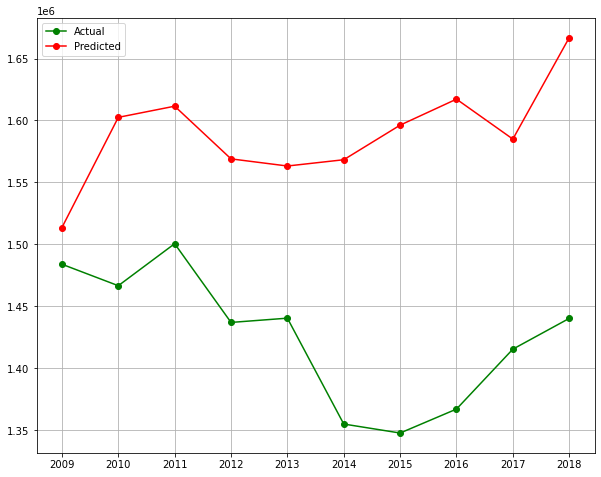

In [84]:
x = list(test['ResidCA'].index)
y_test = list(test['ResidCA'])
y_pred = list(pred)
plt.figure(figsize=(10,8))
plt.plot(x, y_test,'go-',label='Actual')
plt.plot(x, y_pred,'ro-',label='Predicted')
#Get axis
ax=plt.gca()
plt.grid(True)
plt.legend()
plt.show()

In [85]:
#Calculate the confidence interval and hypothesis test results of the model
#The t_statistic attribute indicates the t-statistic of the model parameters, the p_value attribute indicates the p-value of the parameters, and the confidence_interval method returns the confidence interval of the model.
t_statistic = result.tvalues  
p_value = result.pvalues  
confidence_interval = result.conf_int()

In [86]:
confidence_interval

,0,1
ar.S.L12,6.366587e-02,1.114184e+00
ma.S.L12,-1.822168e+00,2.216648e-02
sigma2,5.723911e+09,5.723911e+09


In [87]:
p_value

ar.S.L12    0.027983
ma.S.L12    0.055767
sigma2      0.000000
dtype: float64

In [88]:
t_statistic

ar.S.L12    2.197528e+00
ma.S.L12   -1.912852e+00
sigma2      4.873713e+19
dtype: float64